# Conftur - Analysis

Jupyter Notebook that analyzes data for studying the correlation between the "touristicy" of conference venue and its articles impact.

Our analysis are mainly diveded in two parts:
* Exploratory analysis on the bibliometric data
* Computation and analysis of the correlation between the articles impact and the touristicy of the different conferences locations

____________________________________________________________

For this process, our datasets are going to be used. They can be generated running the notebooks contained in the ```Dataset Creation Pipeline``` folder.


In [1]:
# Libraries Import
from datetime import date
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Libraries options
mpl.rcParams['font.size'] = 22
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-colorblind')

## File Paths
Please set your working directory paths.

In [2]:
# ******************* PATHS ********************+

# Import Directory Path
path_file_import = r'/Users/marcoterzulli/File/Scuola Local/Magistrale/Materiale Corsi Attuali/Tirocinio/Cartella di Lavoro/Archivi Dump di Lavoro/Import/'

# CSV Exports Directory Path
path_file_export = r'/Users/marcoterzulli/File/Scuola Local/Magistrale/Materiale Corsi Attuali/Tirocinio/Cartella di Lavoro/Archivi Dump di Lavoro/Export/'

## Import of the Datasets

In [3]:
df_citations_and_locations = pd.read_csv(path_file_export + 'out_COCI_citations_and_locations_analysis_ready.csv', low_memory=False, index_col=[0])
print(f'Successfully Imported the Conference Citations and Locations CSV')

Successfully Imported the Conference Citations and Locations CSV


In [4]:
df_citations_and_locations

,CitationCount,ConferenceLocation,ConferenceNormalizedName,ConferenceSeriesNormalizedName,Doi,Year
0,10,"Austin, Texas, United States",disc 2014,disc,10.1007/978-3-662-45174-8_28,2014
1,5,"Wrocław, Lower Silesian Voivodeship, Poland",esa 2014,esa,10.1007/978-3-662-44777-2_60,2014
2,11,"Innsbruck, Tyrol, Austria",enter 2013,enter,10.1007/978-3-319-03973-2_13,2013
3,1,"Villefranche-sur-Saône, Auvergne-Rhône-Alpes, ...",dexa 2002,dexa,10.1007/3-540-46146-9_77,2002
4,9,"Zakopane, Lesser Poland Voivodeship, Poland",icaisc 2006,icaisc,10.1007/11785231_94,2006
...,...,...,...,...,...,...
3107878,4,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_9,2011
3107879,4,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_20,2011
3107880,2,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_25,2011
3107881,0,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_12,2011


## Data Cleanup
Before proceeding with the analysis, we need to filter the two recent articles and the too old one (we do not have enough data for the oldest conferences).

### Removing the too recent articles

In [5]:
actual_year = date.today().year

Here you can specify how many years old articles should be at least

In [6]:
minimum_years = 5

Removing the too recent articles:

In [7]:
df_citations_and_locations = df_citations_and_locations.drop(df_citations_and_locations[df_citations_and_locations.Year > actual_year - minimum_years].index)

### Removing the too old articles

We're going to compute the number of citations for each year, so we can choose the starting year for our analysis.

In [8]:
df_articles_groupby_year = df_citations_and_locations.groupby(['Year']).CitationCount.count()
df_articles_groupby_year.head(50)

Year
1951       19
1952       75
1953       55
1954       44
1955       44
1956       72
1957       87
1958      138
1959      173
1960       66
1961      125
1962       81
1963      106
1964      165
1965      242
1966      167
1967      414
1968      298
1969      412
1970      353
1971      655
1972      973
1973     1354
1974     1593
1975     1399
1976     1799
1977     1412
1978     1944
1979     1978
1980     1973
1981     2590
1982     3214
1983     2608
1984     3129
1985     3479
1986     4583
1987     4723
1988     8136
1989     9444
1990    11409
1991    11520
1992    14013
1993    15515
1994    22345
1995    21537
1996    23668
1997    24675
1998    32151
1999    34126
2000    40685
Name: CitationCount, dtype: int64

Here you can specify the starting year.

In [9]:
start_year = 1981

Removing the too old articles:

In [10]:
df_citations_and_locations = df_citations_and_locations.drop(df_citations_and_locations[df_citations_and_locations.Year < 1981].index)

Reset the indexes after the drop:

In [11]:
df_citations_and_locations = df_citations_and_locations.reset_index(drop=True)

____________________________________________________________

## Exploratory Data Analysis on the Bibliometric Data

### General Top and Flop 10 Classifications

#### Top 10 Conferences Editions by Citation Count

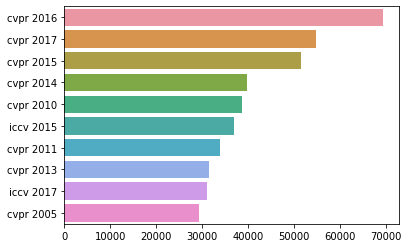

In [12]:
citations_top10 = {v:k for v,k in df_citations_and_locations.groupby(['ConferenceNormalizedName']).CitationCount.sum().sort_values(ascending=False).head(10).items()}

citations_top10_plot = sns.barplot(x=list(citations_top10.values()), y=list(citations_top10.keys()))

#### Flop 10 Conferences Editions by Citation Count

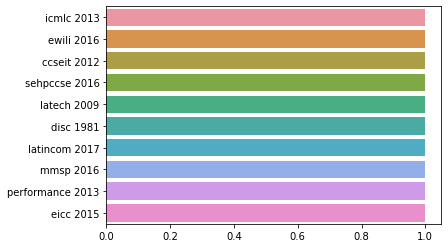

In [13]:
# Only for the conferences with at least a citation
citations_flop10 = {v:k for v,k in df_citations_and_locations[df_citations_and_locations['CitationCount']>0].groupby(['ConferenceNormalizedName']).CitationCount.sum().sort_values().head(10).items()}

citations_flop10_plot = sns.barplot(x=list(citations_flop10.values()), y=list(citations_flop10.keys()))

#### Top 10 Conferences Editions by AVG Citation Count

In [14]:
single_conference_cit = df_citations_and_locations.groupby(['ConferenceNormalizedName']).CitationCount.sum().sort_values(ascending=False)
single_conference_count_article = df_citations_and_locations.groupby(['ConferenceNormalizedName']).CitationCount.count().sort_values(ascending=False)

# AVG Citations Computation
single_conference_avg_cit = {key: (int(val) / int(single_conference_count_article[key])) for key, val in single_conference_cit.items()}

# Dataframe creation
single_conference = {k: [v, single_conference_avg_cit[k], single_conference_count_article[k]] for k, v in single_conference_cit.items()}
df_single_conference = pd.DataFrame(data=single_conference.values(), index=single_conference.keys(), columns=['Total Citations', 'AVG Citations', 'N. of Articles'])
df_single_conference = df_single_conference.sort_values('AVG Citations', ascending=False)

df_single_conference.head(10)

,Total Citations,AVG Citations,N. of Articles
security 2004,1058,1058.000000,1
amia 2009,3792,948.000000,4
wmcsa 1999,5772,481.000000,12
mobicom 2000,13929,480.310345,29
aipr 1994,452,452.000000,1
neurips 1988,1033,344.333333,3
mobicom 2001,9726,324.200000,30
fast 2008,321,321.000000,1
wsna 2002,4641,309.400000,15
sigir 2001,1433,286.600000,5


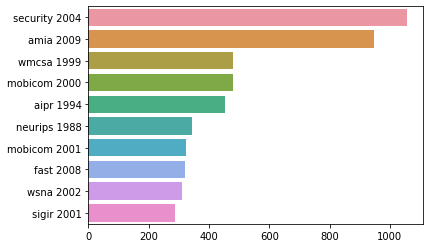

In [15]:
citations_top10_avg = {k:v for k,v in df_single_conference['AVG Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_avg_plot = sns.barplot(x=list(citations_top10_avg.values()), y=list(citations_top10_avg.keys()))

#### Top 10 Considerations
We can notice that the Top 10 Classification by total citations number is different from the Top 10 Classification by the AVG citations. 

It could be interesting to understand the density of the number of articles of each conference.

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


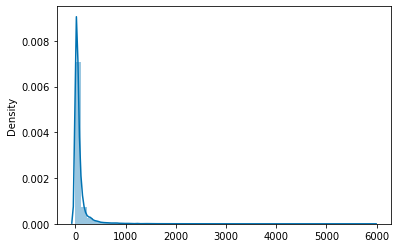

In [16]:
article_by_conference_plot = sns.distplot([v for k,v in single_conference_count_article.items()])
avg_article_by_conference = sum([v for k,v in single_conference_count_article.items()]) / len(single_conference_count_article)

In [17]:
print(f"AVG Articles by conference: {avg_article_by_conference}")

AVG Articles by conference: 85.60002073684939


We can notice that there's a really small number of conferences with a huge number of articles. However, the most of the conferences are in the 10-200 articles range.

### Conferences Evolution Analysis
We're going to study the evolution of a conferences in its editions.

#### AVG Citations of the Conferences
AVG Citation calculated over all the editions of a conference, without considering the year.

In [18]:
conference_tot_cit = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName']).CitationCount.sum()
conference_tot_article = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName']).CitationCount.count()
avg_cit_for_conference = {key:(int(val) / int(conference_tot_article[key])) for key, val in conference_tot_cit.items()}

conference = {k: [v, avg_cit_for_conference[k], conference_tot_article[k]] for k, v in conference_tot_cit.items()}
df_conference = pd.DataFrame(data=conference.values(), index=conference.keys(), columns=['Total Citations', 'AVG Citations', 'N. of Articles'])
df_conference = df_conference.sort_values(['AVG Citations'], ascending=False)

df_conference.head(10)

,Total Citations,AVG Citations,N. of Articles
neurips,1033,344.333333,3
wsna,4641,309.400000,15
amia,3861,167.869565,23
mobidata,4202,161.615385,26
avmfss,111,111.000000,1
fosad,487,81.166667,6
hotpower,306,76.500000,4
sna,1267,70.388889,18
caivd,650,65.000000,10
webnet,64,64.000000,1


#### Top 10 Conferences by Citation Count

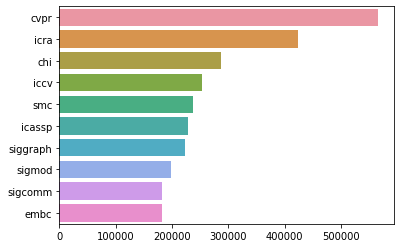

In [19]:
citations_top10_conference_by_cit = {k:v for k,v in df_conference['Total Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_conference_by_cit_plot = sns.barplot(x = list(citations_top10_conference_by_cit.values()), y = list(citations_top10_conference_by_cit.keys()))

In [20]:
df_citations_and_locations

,CitationCount,ConferenceLocation,ConferenceNormalizedName,ConferenceSeriesNormalizedName,Doi,Year
0,10,"Austin, Texas, United States",disc 2014,disc,10.1007/978-3-662-45174-8_28,2014
1,5,"Wrocław, Lower Silesian Voivodeship, Poland",esa 2014,esa,10.1007/978-3-662-44777-2_60,2014
2,11,"Innsbruck, Tyrol, Austria",enter 2013,enter,10.1007/978-3-319-03973-2_13,2013
3,1,"Villefranche-sur-Saône, Auvergne-Rhône-Alpes, ...",dexa 2002,dexa,10.1007/3-540-46146-9_77,2002
4,9,"Zakopane, Lesser Poland Voivodeship, Poland",icaisc 2006,icaisc,10.1007/11785231_94,2006
...,...,...,...,...,...,...
2476746,4,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_9,2011
2476747,4,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_20,2011
2476748,2,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_25,2011
2476749,0,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_12,2011


#### Top 10 Conferences by AVG Citation Count

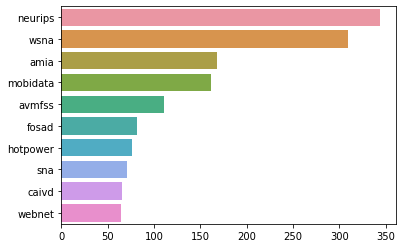

In [21]:
citations_top10_conference_by_avgCit = {k:v for k,v in df_conference['AVG Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_conference_by_avgCit_plot = sns.barplot(x = list(citations_top10_conference_by_avgCit.values()), y = list(citations_top10_conference_by_avgCit.keys()))

In [22]:
df_citations_and_locations.loc[df_citations_and_locations['ConferenceSeriesNormalizedName'].str.contains("'", case=False)]

,CitationCount,ConferenceLocation,ConferenceNormalizedName,ConferenceSeriesNormalizedName,Doi,Year
